In [31]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import re
from wordcloud import WordCloud

In [2]:
import nltk
from nltk.corpus import stopwords

In [3]:
import string
from string import punctuation
from nltk.stem.snowball import SnowballStemmer

In [4]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, SpatialDropout1D

Using TensorFlow backend.
C:\Users\ajsal\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ajsal\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ajsal\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ajsal\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train = train.head(6000)
test = train.head(1000)

In [6]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [7]:
test.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [8]:
punctuation = punctuation + '0123456789'
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~0123456789'

In [9]:
def html(sentence):
    clean = re.compile('<.*?>')
    sentence = re.sub(clean,'',str(sentence))
    sentence = sentence.strip()
    return sentence
def cleanPunc(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#|0|1|2|3|4|5|6|7|8|9]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/&|^|%|^|@|$|*|;|.|,]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned
def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [10]:
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)


In [11]:
stemmer = SnowballStemmer("english")
def stemmering(sentence):
    stemmersequence = []
    for words in sentence.split():
        stem = stemmer.stem(words)
        stemmersequence.append(stem)
    return ' '.join(stemmersequence)

In [12]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = []
    for word in sentence.split():
        stem = stemmer.stem(word)
        stem = stemmer.stem(words)
        stemmersequence.append(stem)
    return ' '.join(stemmersequence)

In [13]:
train['comment_text'] = train['comment_text'].str.lower()
train['comment_text'] = train['comment_text'].apply(html)
train['comment_text'] = train['comment_text'].apply(cleanPunc)
train['comment_text'] = train['comment_text'].apply(keepAlpha)
train['comment_text'] = train['comment_text'].apply(removeStopWords)
train['comment_text'] = train['comment_text'].apply(stemmering)

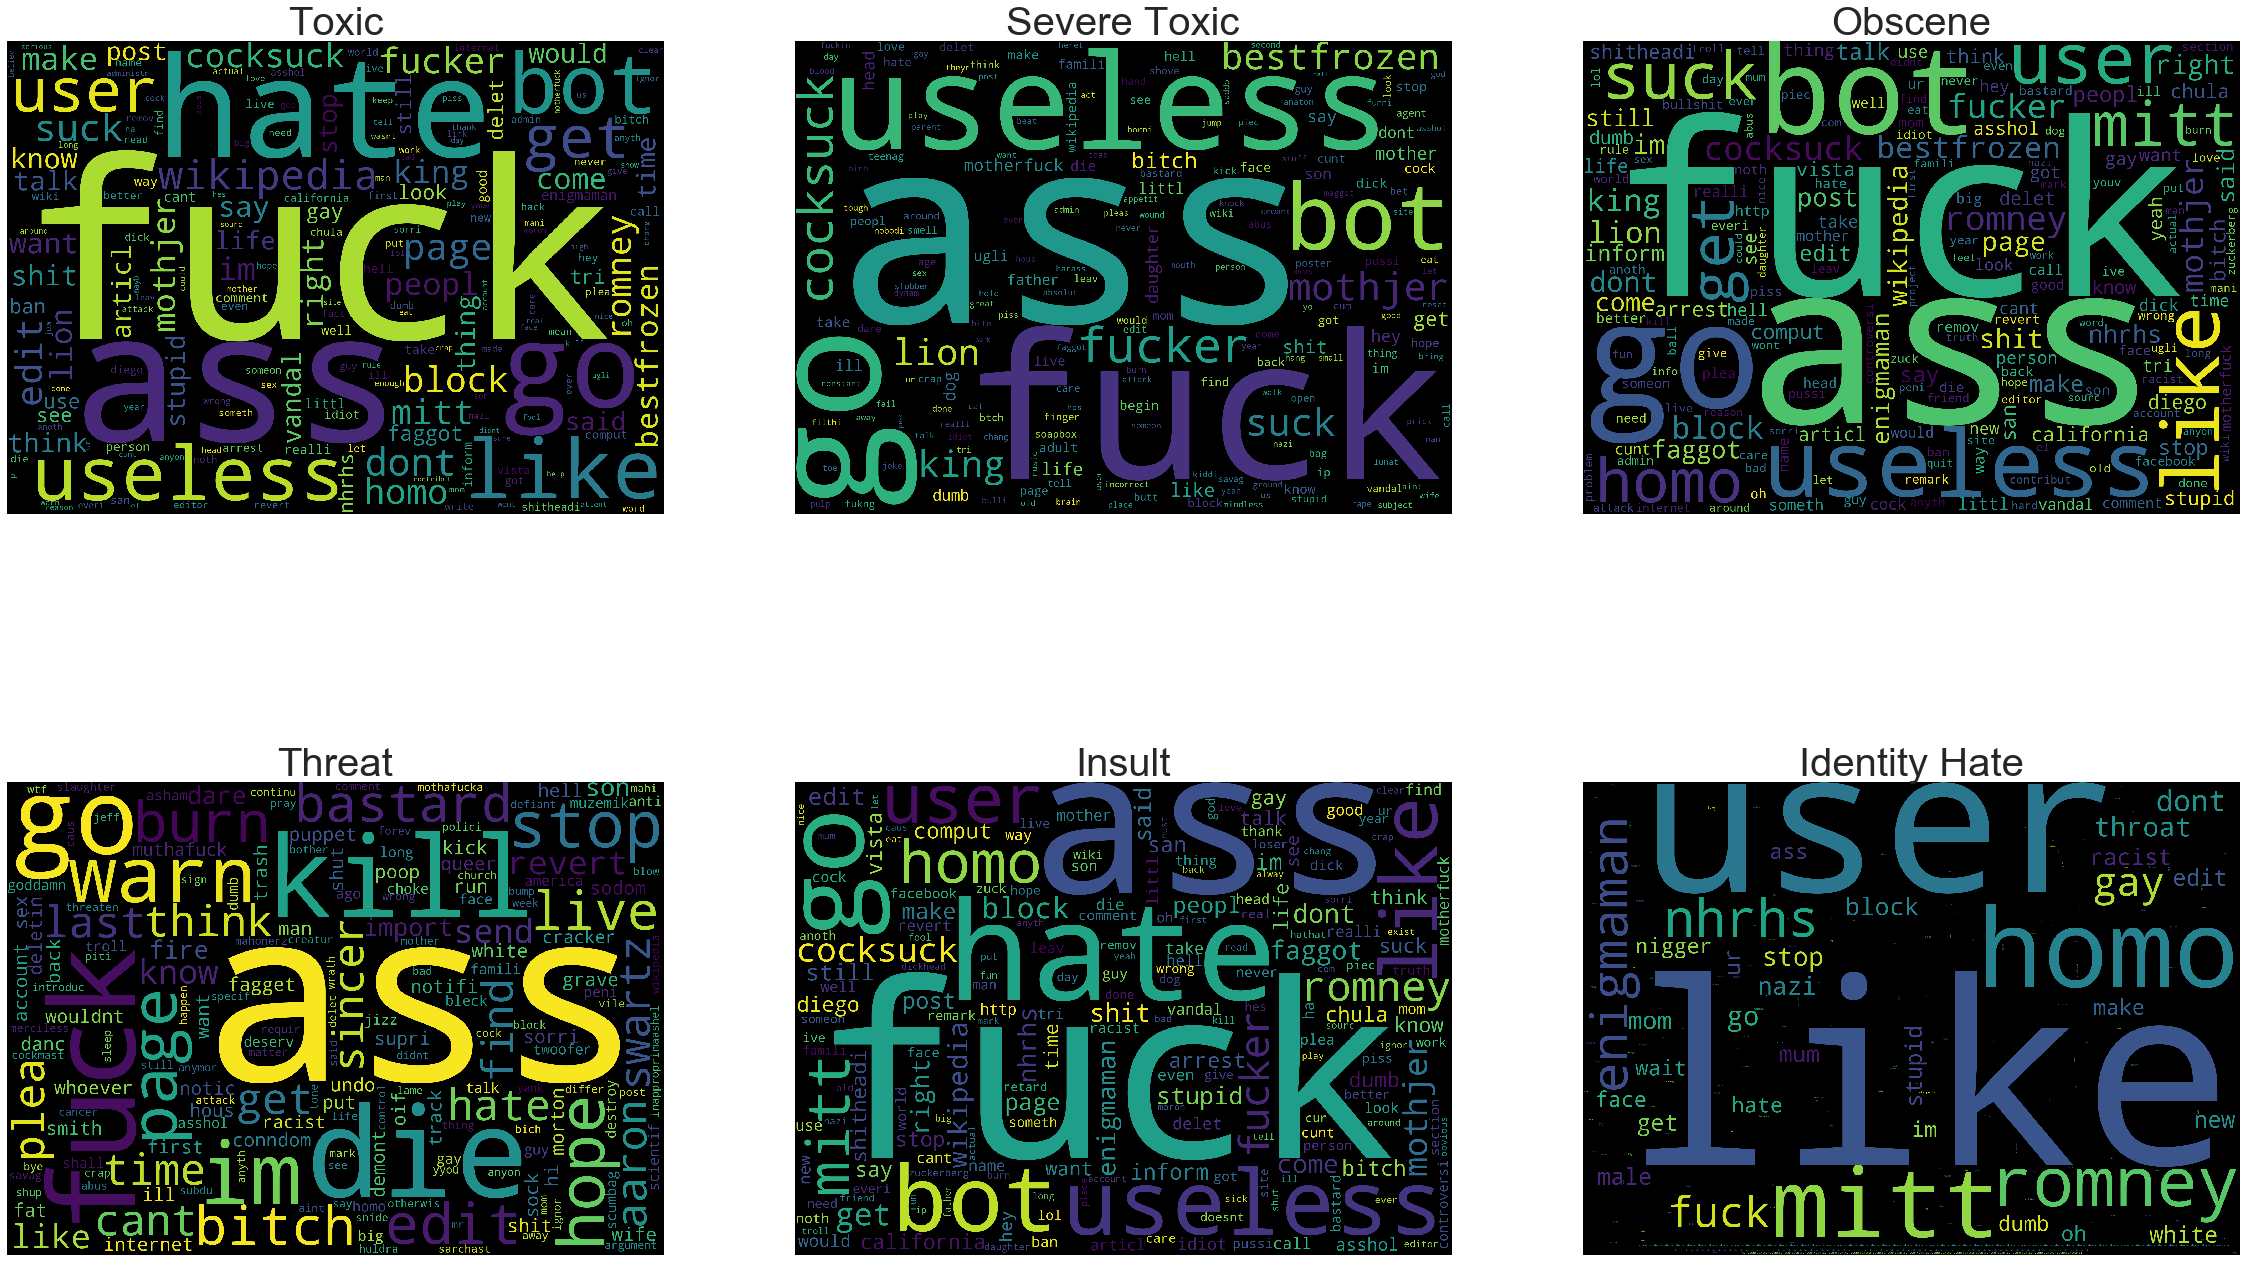

In [32]:
plt.figure(figsize=(40,25))

# toxic
subset = train[train.toxic==1]
text = subset.comment_text.values
cloud_toxic = WordCloud(
                          stopwords=stop_words,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("Toxic",fontsize=40)
plt.imshow(cloud_toxic)


# severe_toxic
subset = train[train.severe_toxic==1]
text = subset.comment_text.values
cloud_severe_toxic = WordCloud(
                          stopwords=stop_words,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 2)
plt.axis('off')
plt.title("Severe Toxic",fontsize=40)
plt.imshow(cloud_severe_toxic)


# obscene
subset = train[train.obscene==1]
text = subset.comment_text.values
cloud_obscene = WordCloud(
                          stopwords=stop_words,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 3)
plt.axis('off')
plt.title("Obscene",fontsize=40)
plt.imshow(cloud_obscene)


# threat
subset = train[train.threat==1]
text = subset.comment_text.values
cloud_threat = WordCloud(
                          stopwords=stop_words,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 4)
plt.axis('off')
plt.title("Threat",fontsize=40)
plt.imshow(cloud_threat)


# insult
subset = train[train.insult==1]
text = subset.comment_text.values
cloud_insult = WordCloud(
                          stopwords=stop_words,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 5)
plt.axis('off')
plt.title("Insult",fontsize=40)
plt.imshow(cloud_insult)


# identity_hate
subset = train[train.identity_hate==1]
text = subset.comment_text.values
cloud_identity_hate = WordCloud(
                          stopwords=stop_words,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 6)
plt.axis('off')
plt.title("Identity Hate",fontsize=40)
plt.imshow(cloud_identity_hate)

plt.show()

In [14]:
test['comment_text'] = test['comment_text'].str.lower()
test['comment_text'] = test['comment_text'].apply(html)
test['comment_text'] = test['comment_text'].apply(cleanPunc)
test['comment_text'] = test['comment_text'].apply(keepAlpha)
test['comment_text'] = test['comment_text'].apply(removeStopWords)
test['comment_text'] = test['comment_text'].apply(stemmering)

C:\Users\ajsal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ajsal\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ajsal\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [15]:
max_words = 7000
max_seq_length = 500
embed_dim = 100
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(train['comment_text'].values)

In [16]:
X_train = tokenizer.texts_to_sequences(train['comment_text'].values) 
X_train = pad_sequences(X_train, maxlen = max_seq_length)

In [17]:
Y_train = train.drop(["id",'comment_text'],axis = 1)

In [19]:
Y_train.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [20]:
tokenizer_1 = Tokenizer(num_words = max_words)
tokenizer_1.fit_on_texts(test['comment_text'].values)
X_test = tokenizer.texts_to_sequences(test['comment_text'].values) 
X_test = pad_sequences(X_test, maxlen = max_seq_length)
Y_test = test.drop(["id",'comment_text'],axis = 1)

In [22]:
model = Sequential()
model.add(Embedding(max_words,embed_dim,input_length=X_train.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 100)          700000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 500, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 606       
Total params: 781,006
Trainable params: 781,006
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
epochs = 5
batch_size = 64
history = model.fit(X_train,Y_train,epochs = epochs,verbose = 1,validation_split = 0.1,batch_size=batch_size)


Train on 5400 samples, validate on 600 samples
Epoch 1/5
5400/5400 [==============================] - 33s 6ms/step - loss: 0.3492 - accuracy: 0.9526 - val_loss: 0.4142 - val_accuracy: 0.9950
Epoch 2/5
5400/5400 [==============================] - 32s 6ms/step - loss: 0.3394 - accuracy: 0.9933 - val_loss: 0.4145 - val_accuracy: 0.9950
Epoch 3/5
5400/5400 [==============================] - 32s 6ms/step - loss: 0.3392 - accuracy: 0.9931 - val_loss: 0.4131 - val_accuracy: 0.9950
Epoch 4/5
5400/5400 [==============================] - 32s 6ms/step - loss: 0.3392 - accuracy: 0.9930 - val_loss: 0.4154 - val_accuracy: 0.9933
Epoch 5/5
5400/5400 [==============================] - 33s 6ms/step - loss: 0.3390 - accuracy: 0.9930 - val_loss: 0.4132 - val_accuracy: 0.9933


In [24]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

1000/1000 [==============================] - 6s 6ms/step
Test set
  Loss: 0.339
  Accuracy: 0.997


[]

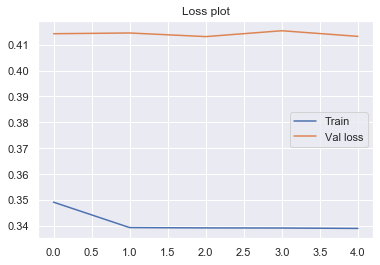

In [26]:
plt.title('Loss plot')
plt.plot(history.history['loss'],label = 'Train')
plt.plot(history.history['val_loss'],label = 'Val loss')
plt.legend()
plt.plot()

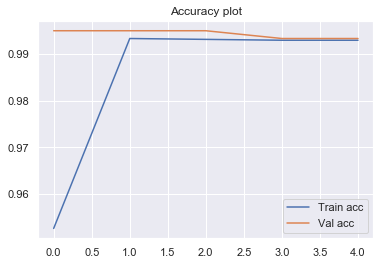

In [29]:
plt.title('Accuracy plot')
plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.legend()
plt.show();